In [42]:
# import os
import sys
import numpy as np
# import psycopg2
import sqlalchemy
import pandas as pd

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
# from rdkit.Chem.Draw import IPythonConsole
# # IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs
# IPythonConsole.ipython_useSVG=False
import cairosvg

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    #context='paper',
    font_scale=8/8.8,
    context="talk",
    style='ticks',
    color_codes=True,
    rc={'legend.frameon': False})

plt.rcParams['svg.fonttype'] = 'none'

%matplotlib inline

# Top molecules

In [43]:
df = pd.read_csv("log.out.top_hits.csv")
df.head()

,Unnamed: 0,rad,smiles
0,66,198.669061,C=C(C)C1=C(S)[CH]C(C)=C1CC
1,48,197.343813,CC=C1CC=C(O)C1=C([O])CC
2,50,197.148268,C=CC(C)=CC(CC)=C([S])CC
3,67,196.704267,C=CC=C(CS)C(CC)=C([O])O
4,30,196.394525,C=C(O)C(=CC)C(CC)=C(C)[S]


In [44]:
def save_svg(svg, svg_file, dpi=300):
    with open(svg_file, 'w') as afile:
        # write the raw string of the svg to file
        # see https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.display
        afile.write(svg._repr_svg_())
    png_file = svg_file.replace('.svg', '.png')
    a_str = svg._repr_svg_().encode('utf-8')
    cairosvg.svg2png(bytestring=a_str, write_to=png_file, dpi=dpi)
    return

def draw_mols(df_rew, out_dir, top=12):
    mols = list(df.head(top)["smiles"].apply(lambda x: Chem.MolFromSmiles(x)))
    rewards = list(df.head(top)['rad'].round(3))
    rewards = ['QED: ' + str(r) for r in rewards]
    print(rewards)
    molsPerRow = 2 if top < 5 else 4
    svg = Draw.MolsToGridImage(
        mols,
        molsPerRow=molsPerRow,
        subImgSize=(200, 120),
        legends=rewards,
        useSVG=True)
    out_file = f"{out_dir}/top_{top}_mols.svg"
    print(out_file)
    save_svg(svg, out_file)
    return svg

In [45]:
_ = draw_mols(df, ".", top=4)

['QED: 198.669', 'QED: 197.344', 'QED: 197.148', 'QED: 196.704']
./top_4_mols.svg


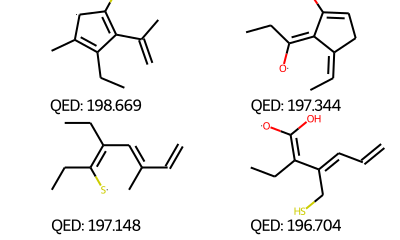

In [46]:
from IPython.display import Image
Image(filename='top_4_mols.png') 

# Learning curve

In [50]:
sns.set(
    #context='paper',
    font_scale=0.95,
    context="talk",
    style='ticks',
    color_codes=True,
    rc={'legend.frameon': False})

In [58]:
df = pd.read_csv("../optimize_qed/ray_results/PPO_molecule_graph_problem_cc649_00000_0_entropy_coeff=0.05,num_sgd_iter=10_2021-10-27_14-45-19/progress.csv")
df.head()

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,agent_timesteps_total,done,episodes_total,...,perf/ram_util_percent,info/learner/default_policy/learner_stats/cur_kl_coeff,info/learner/default_policy/learner_stats/cur_lr,info/learner/default_policy/learner_stats/total_loss,info/learner/default_policy/learner_stats/policy_loss,info/learner/default_policy/learner_stats/vf_loss,info/learner/default_policy/learner_stats/vf_explained_var,info/learner/default_policy/learner_stats/kl,info/learner/default_policy/learner_stats/entropy,info/learner/default_policy/learner_stats/entropy_coeff
0,0.746982,0.0,0.062667,4.848225,817,144,3961,3961,False,817,...,4.100000,0.2000,0.010000,-0.056937,0.000201,0.049283,-0.030875,1.454387e-07,2.128411,0.05
1,0.664540,0.0,0.062430,4.941542,804,144,7934,7934,False,1621,...,4.429545,0.1000,0.009911,-0.114109,-0.035187,0.023499,0.386862,2.438833e-02,2.097204,0.05
2,0.820313,0.0,0.126849,5.933526,692,144,12040,12040,False,2313,...,4.463043,0.1500,0.009821,-0.133022,-0.063027,0.026821,0.429347,3.188937e-02,2.031978,0.05
3,0.845596,0.0,0.210992,7.394316,563,144,16203,16203,False,2876,...,4.463265,0.2250,0.009729,-0.114620,-0.052927,0.030607,0.334126,3.145909e-02,1.987555,0.05
4,0.869383,0.0,0.292186,8.991853,491,144,20618,20618,False,3367,...,4.442254,0.3375,0.009635,-0.103939,-0.046041,0.031403,0.263395,2.464672e-02,1.952378,0.05


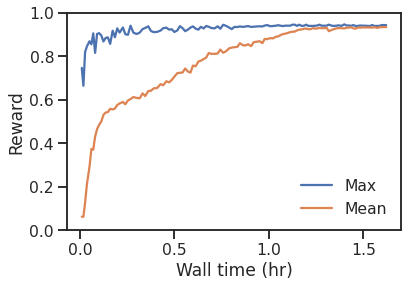

In [60]:
fig, ax = plt.subplots()
df.index = df["time_total_s"]
df.index = df.index / 3600.

_ = df["episode_reward_max"].plot(ax=ax, legend=True)
_ = df["episode_reward_mean"].plot(ax=ax, legend=True, ylim=(0, 1.))

ax.set_ylabel("Reward")
ax.set_xlabel("Wall time (hr)")
_ = ax.legend(["Max", "Mean"])